# **Proyek Analisis Data: Bike Sharing Dataset**

---
Nama: Axelino Natanael Ndahawali

Email: azelnatan@gmail.com

Username Dicoding: natanaelhwang




# **Menentukan Pertanyaan Bisnis**


1.   Apakah terdapat perbedaan pola pengunaan layanan Bike Sharing antara hari kerja dan hari libur?
2. Bagaimana pengaruh kondisi cuaca terhadap jumlah pengguna Bike Sharing?
3. Apakah terdapat perbedaan pola penggunaan layanan Bike Sharing antara musim yang berbeda?
4. Apakah ada tren kenaikan atau penurunan jumlah pengguna Bike Sharing dari tahun 2011 ke 2012?



# **Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Wrangling**

### **Gathering Data**

In [2]:
day_data = pd.read_csv("data/day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### **Assessing Data**

#### **Cek tipe data**

In [3]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### **Cek missing value**

In [4]:
day_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### **Cek duplikasi data**

In [5]:
duplicate_day = day_data.duplicated().sum()
print("Jumlah duplikasi data pada tabel day_data:",duplicate_day)

Jumlah duplikasi data pada tabel day_data: 0


#### **Cek parameter statstik**

In [6]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### **Cleaning Data**

#### **Memperbaiki tipe data**

In [7]:
day_data["dteday"] = pd.to_datetime(day_data["dteday"])

In [8]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

# **Exploratory Data Analysis**

### **Denormalize**

In [9]:
day_data.loc[day_data["season"] == 1, "season"] = "Springer"
day_data.loc[day_data["season"] == 2, "season"] = "Summer"
day_data.loc[day_data["season"] == 3, "season"] = "Fall"
day_data.loc[day_data["season"] == 4, "season"] = "Winter"

day_data.season.value_counts().sort_index()

Fall        188
Springer    181
Summer      184
Winter      178
Name: season, dtype: int64

In [10]:
day_data.loc[day_data["yr"] == 0, "yr"] = "2011"
day_data.loc[day_data["yr"] == 1, "yr"] = "2012"

day_data.yr.value_counts().sort_index()

2011    365
2012    366
Name: yr, dtype: int64

In [11]:
day_data.loc[day_data["holiday"] == 0, "holiday"] = "Holiday"
day_data.loc[day_data["holiday"] == 1, "holiday"] = "Not a Holiday"

day_data.holiday.value_counts().sort_index()

Holiday          710
Not a Holiday     21
Name: holiday, dtype: int64

In [12]:
day_data.loc[day_data["weekday"] == 0, "weekday"] = "Sun"
day_data.loc[day_data["weekday"] == 1, "weekday"] = "Mon"
day_data.loc[day_data["weekday"] == 2, "weekday"] = "Tue"
day_data.loc[day_data["weekday"] == 3, "weekday"] = "Wed"
day_data.loc[day_data["weekday"] == 4, "weekday"] = "Thu"
day_data.loc[day_data["weekday"] == 5, "weekday"] = "Fri"
day_data.loc[day_data["weekday"] == 6, "weekday"] = "Sat"

day_data.weekday.value_counts().sort_index()

Fri    104
Mon    105
Sat    105
Sun    105
Thu    104
Tue    104
Wed    104
Name: weekday, dtype: int64

In [13]:
day_data.loc[day_data["workingday"] == 0, "workingday"] = "Holiday"
day_data.loc[day_data["workingday"] == 1, "workingday"] = "Working Day"

day_data.workingday.value_counts().sort_index()

Holiday        231
Working Day    500
Name: workingday, dtype: int64

In [14]:
day_data.loc[day_data["weathersit"] == 1, "weathersit"] = "Clear"
day_data.loc[day_data["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
day_data.loc[day_data["weathersit"] == 3, "weathersit"] = "Light Snow"
day_data.loc[day_data["weathersit"] == 4, "weathersit"] = "Heavy Rain"

day_data.weathersit.value_counts().sort_index()

Clear            463
Light Snow        21
Mist + Cloudy    247
Name: weathersit, dtype: int64

In [15]:
day_data.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
324,325,2011-11-21,Winter,2011,11,Holiday,Mon,Working Day,Light Snow,0.447500,0.445062,0.910000,0.138054,220,2545,2765
38,39,2011-02-08,Springer,2011,2,Holiday,Tue,Working Day,Clear,0.220833,0.198246,0.537917,0.361950,64,1466,1530
549,550,2012-07-03,Fall,2012,7,Holiday,Tue,Working Day,Clear,0.780833,0.702650,0.492083,0.126237,1052,5608,6660
342,343,2011-12-09,Winter,2011,12,Holiday,Fri,Working Day,Clear,0.290833,0.317542,0.695833,0.082717,261,3359,3620
394,395,2012-01-30,Springer,2012,1,Holiday,Mon,Working Day,Clear,0.269167,0.262625,0.400833,0.215792,126,3498,3624


# **Visualization & Explanatory Analysis**

###**1. Apakah terdapat perbedaan pola pengunaan layanan Bike Sharing antara hari kerja dan hari libur?**

In [16]:
workingday = day_data.groupby(by="workingday")['cnt'].sum()
workingday

workingday
Holiday        1000269
Working Day    2292410
Name: cnt, dtype: int64

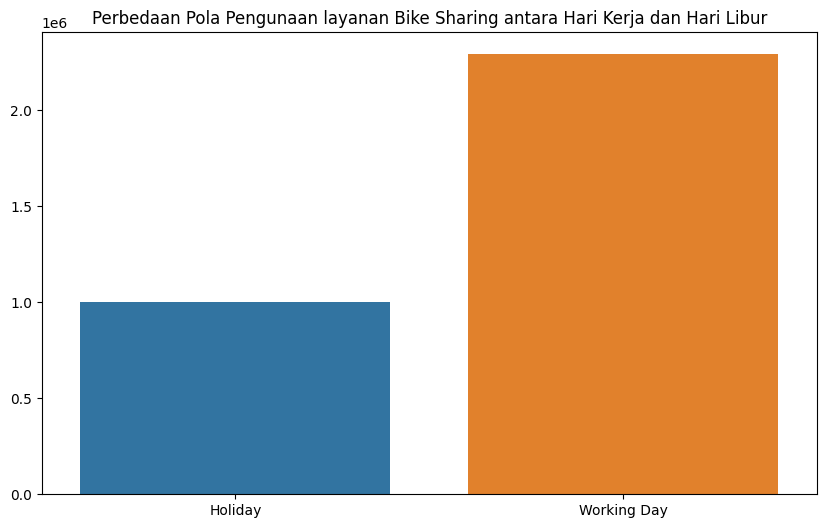

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=workingday.index, y=workingday.values)
plt.ylabel(None)
plt.xlabel(None)
plt.title('Perbedaan Pola Pengunaan layanan Bike Sharing antara Hari Kerja dan Hari Libur')
plt.show()

### **2. Bagaimana pengaruh kondisi cuaca terhadap jumlah pengguna Bike Sharing?**

In [18]:
weathersit = day_data.groupby(by="weathersit")['cnt'].sum()
weathersit

weathersit
Clear            2257952
Light Snow         37869
Mist + Cloudy     996858
Name: cnt, dtype: int64

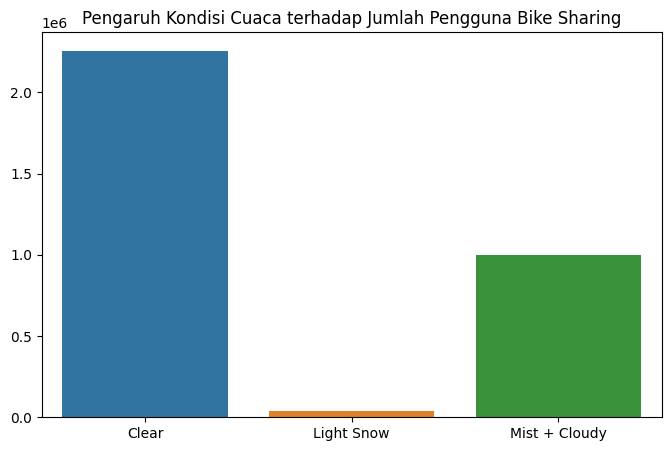

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(x=weathersit.index, y=weathersit.values)
plt.ylabel(None)
plt.xlabel(None)
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Pengguna Bike Sharing')
plt.show()

### **3. Apakah terdapat perbedaan pola penggunaan layanan Bike Sharing  antara musim yang berbeda?**

In [20]:
season = day_data.groupby(by="season")['cnt'].sum()
season

season
Fall        1061129
Springer     471348
Summer       918589
Winter       841613
Name: cnt, dtype: int64

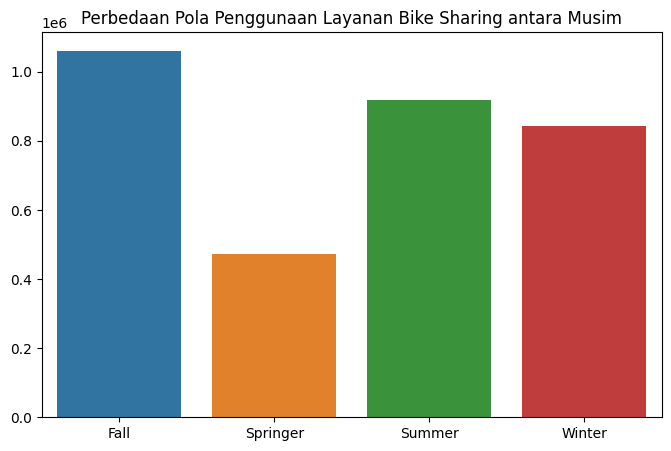

In [21]:
plt.figure(figsize=(8, 5))
sns.barplot(x=season.index, y=season.values)
plt.ylabel(None)
plt.xlabel(None)
plt.title('Perbedaan Pola Penggunaan Layanan Bike Sharing antara Musim')
plt.show()

### **4. Apakah ada tren kenaikan atau penurunan jumlah pengguna Bike Sharing dari tahun 2011 ke 2012?**

In [22]:
yr = day_data.groupby(by="yr")['cnt'].sum()
yr

yr
2011    1243103
2012    2049576
Name: cnt, dtype: int64

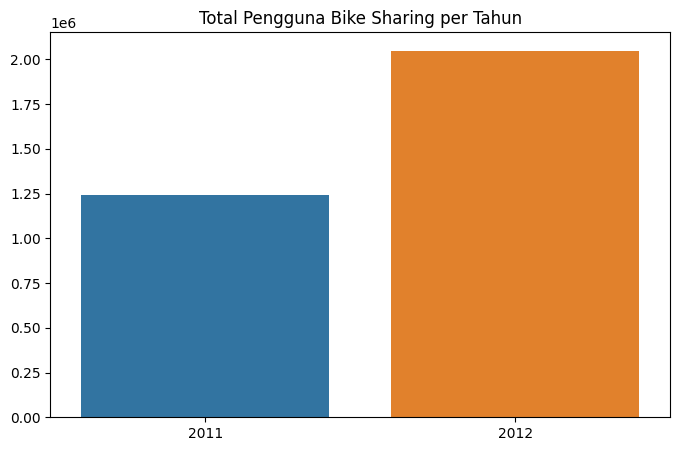

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(x=yr.index, y=yr.values)
plt.ylabel(None)
plt.xlabel(None)
plt.title('Total Pengguna Bike Sharing per Tahun')
plt.show()

# **Conclusion**



1.   Jumlah pengguna Bike Sharing pada hari kerja lebih banyak daripada hari libur. Dapat disimpulkan bahwa pengguna Bike Sharing lebih banyak menggunakan sepeda untuk berangkat kerja daripada untuk bersepeda di hari libur.
2.   Kondisi cuaca secara signifikan mempengaruhi jumlah pengguna Bike Sharing. Ditemukan jumlah pengguna Bike Sharing terbanyak pada kondisi cuaca cerah (Clear).
3.   Jumlah pengguna Bike Sharing mencapai puncaknya pada musim gugur (Fall) dan menurun pada musim semi (Springer). Dapat disimpulkan bahwa pengguna Bike Sharing lebih suka bersepeda pada musim gugur.
4.   Terdapat peningkatan jumlah pengguna Bike Sharing dari tahun 2011 ke 2012. Tren kenaikan ini menandakan bahwa layanan Bike Sharing banyak diminati pada tahun 2012.

# **Export Dataset**

In [24]:
day_data.to_csv("dashboard/main_data.csv", index=False)